<a href="https://colab.research.google.com/github/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material.git

fatal: destination path 'Fault-Tolerant-Control-Systems-TA-Class-Material' already exists and is not an empty directory.


#Libraries

In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#DATA

upload the data in the colab or link to the google drive

In [ ]:
drive.mount('/content/gdrive')

In [135]:
data_train_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  train (20x960x52).xlsx",header=None)
data_test_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  test  (20x960x52).xlsx")
data_train_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 train (480x52).xlsx")
data_test_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 test (960x52).xlsx")
# X = pd.read_csv("/content/myfile.csv")
# X = pd.read_table("/content/myfile.dat")

In [136]:
X_train_fault = data_train_fault.iloc[:,4:]
X_test_fault = data_test_fault.iloc[:,4:]

y_train_fault = data_train_fault.iloc[:,1]
y_test_fault = data_test_fault.iloc[:,1]

X_train_normal = data_train_normal.iloc[:,4:]
X_test_normal = data_test_normal.iloc[:,4:]

y_train_normal = data_train_normal.iloc[:,1]
y_test_normal = data_test_normal.iloc[:,1]

In [137]:
print(X_train_fault)
print(X_test_fault)
print(y_train_fault)
print(y_test_fault)
print(X_train_normal)
print(X_test_normal)
print(y_train_normal)
print(y_test_normal)

           4       5       6       7   ...      52      53      54      55
0     0.25038  3674.0  4529.0  9.2320  ...  47.757  47.510  41.258  18.447
1     0.25109  3659.4  4556.6  9.4264  ...  43.692  47.427  41.359  17.194
2     0.25038  3660.3  4477.8  9.4426  ...  46.699  47.468  41.199  20.530
3     0.24977  3661.3  4512.1  9.4776  ...  47.541  47.658  41.643  18.089
4     0.29405  3679.0  4497.0  9.3381  ...  47.645  47.346  41.507  18.461
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
9995  0.20006  3708.5  4497.7  9.2167  ...  44.981  48.511  41.290  21.141
9996  0.31328  3666.5  4483.6  9.2536  ...  46.823  48.597  41.941  18.724
9997  0.31186  3674.1  4480.6  9.2912  ...  45.048  48.664  41.112  16.435
9998  0.30026  3690.1  4519.3  9.2301  ...  43.100  48.896  41.682  18.685
9999  0.30233  3719.6  4528.8  9.3472  ...  46.241  48.927  40.377  20.561

[10000 rows x 52 columns]
       xmeas_1  xmeas_2  xmeas_3  xmeas_4  ...   xmv_8   xmv_9  xmv_10  x

In [138]:
X_train = data_train_fault.iloc[:,4:].values
X_test = data_test_fault.iloc[:,4:].values
y_train = data_train_fault.iloc[:,1].values
y_test = data_test_fault.iloc[:,1].values
X_train_normal = data_train_normal.iloc[:,4:].values
X_test_normal = data_test_normal.iloc[:,4:].values
y_train_normal = data_train_normal.iloc[:,1].values
y_test_normal = data_test_normal.iloc[:,1].values

In [139]:
print(X_train_fault)
print(X_test_fault)
print(y_train_fault)
print(y_test_fault)
print(X_train_normal)
print(X_test_normal)
print(y_train_normal)
print(y_test_normal)

           4       5       6       7   ...      52      53      54      55
0     0.25038  3674.0  4529.0  9.2320  ...  47.757  47.510  41.258  18.447
1     0.25109  3659.4  4556.6  9.4264  ...  43.692  47.427  41.359  17.194
2     0.25038  3660.3  4477.8  9.4426  ...  46.699  47.468  41.199  20.530
3     0.24977  3661.3  4512.1  9.4776  ...  47.541  47.658  41.643  18.089
4     0.29405  3679.0  4497.0  9.3381  ...  47.645  47.346  41.507  18.461
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
9995  0.20006  3708.5  4497.7  9.2167  ...  44.981  48.511  41.290  21.141
9996  0.31328  3666.5  4483.6  9.2536  ...  46.823  48.597  41.941  18.724
9997  0.31186  3674.1  4480.6  9.2912  ...  45.048  48.664  41.112  16.435
9998  0.30026  3690.1  4519.3  9.2301  ...  43.100  48.896  41.682  18.685
9999  0.30233  3719.6  4528.8  9.3472  ...  46.241  48.927  40.377  20.561

[10000 rows x 52 columns]
       xmeas_1  xmeas_2  xmeas_3  xmeas_4  ...   xmv_8   xmv_9  xmv_10  x

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_fault)
X_train_fault_scaled = scaler.transform(X_train_fault)

scaler.fit(X_test_fault)
X_test_fault_scaled = scaler.transform(X_test_fault)

scaler.fit(X_train_normal)
X_train_normal_scaled = scaler.transform(X_train_normal)

scaler.fit(X_test_normal)
X_test_normal_scaled = scaler.transform(X_test_normal)

In [142]:
X_train_fault_scaled

array([[-0.10849939,  0.30383548,  0.22161119, ..., -0.23169863,
        -0.1924446 , -0.15883305],
       [-0.10366818, -0.04177724,  0.48207145, ..., -0.23656   ,
        -0.18180454, -0.314138  ],
       [-0.10849939, -0.02047235, -0.26156145, ..., -0.2341586 ,
        -0.19866007,  0.09934749],
       ...,
       [ 0.30984218,  0.3062027 , -0.23513795, ..., -0.16410804,
        -0.20782527, -0.40821339],
       [ 0.23090981,  0.68495637,  0.13007262, ..., -0.15051964,
        -0.14777742, -0.12933379],
       [ 0.24499516,  1.38328345,  0.2197238 , ..., -0.14870394,
        -0.2852554 ,  0.10318983]])

In [146]:
# apply normalization techniques
X_train_fault_scaled2 = (pd.DataFrame(X_train_fault)).copy()
X_test_fault_scaled2 = (pd.DataFrame(X_test_fault)).copy()
X_train_normal_scaled2 = (pd.DataFrame(X_train_normal)).copy()
X_test_normal_scaled2 = (pd.DataFrame(X_test_normal)).copy()

for column in X_train_fault_scaled2.columns:
	X_train_fault_scaled2[column] = X_train_fault_scaled2[column] / X_train_fault_scaled2[column].abs().max()
 
for column in X_test_fault_scaled2.columns:
	X_test_fault_scaled2[column] = X_test_fault_scaled2[column] / X_test_fault_scaled2[column].abs().max()	
 
for column in X_train_normal_scaled2.columns:
	X_train_normal_scaled2[column] = X_train_normal_scaled2[column] / X_train_normal_scaled2[column].abs().max()	
 
for column in X_test_normal_scaled2.columns:
	X_test_normal_scaled2[column] = X_test_normal_scaled2[column] / X_test_normal_scaled2[column].abs().max()	
 
# view normalized data
display(X_train_fault_scaled2)
display(X_test_fault_scaled2)
display(X_train_normal_scaled2)
display(X_test_normal_scaled2)

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.249085,0.961730,0.903397,0.827463,0.957688,0.967420,0.901433,0.879479,0.996359,0.422461,0.944115,0.964448,0.894753,0.844861,0.938641,0.900226,0.877721,0.900130,0.495543,0.896485,0.959789,0.946337,0.876031,0.901546,0.729074,0.928494,0.790169,0.866611,0.833451,0.906367,0.619459,0.610782,0.713315,0.869397,0.821590,0.818240,0.378381,0.635707,0.690993,0.958946,0.955525,0.855640,0.652605,0.246422,0.655701,0.560388,0.420399,0.883496,0.862055,0.473490,0.412456,0.211228
1,0.249791,0.957908,0.908902,0.844887,0.951704,0.971389,0.901667,0.881088,0.996359,0.419988,0.944517,0.940429,0.895059,0.824270,0.906021,0.900488,0.897492,0.899911,0.497550,0.896695,0.959333,0.951091,0.876031,0.901546,0.729074,0.928494,0.790169,0.866611,0.833451,0.906367,0.619459,0.610782,0.713315,0.869397,0.821590,0.818240,0.378381,0.635707,0.690993,0.958946,0.955525,0.859056,0.648598,0.245733,0.621261,0.559046,0.422936,0.804818,0.788678,0.472663,0.413466,0.196881
2,0.249085,0.958144,0.893184,0.846339,0.957189,0.959845,0.902067,0.878398,0.996442,0.419275,0.946191,0.943204,0.895637,0.852118,0.930152,0.900923,0.843296,0.900130,0.496558,0.896905,0.959434,0.951484,0.864573,0.888986,0.721115,0.920926,0.797955,0.852226,0.834134,0.901056,0.617366,0.631976,0.720456,0.868206,0.823405,0.850776,0.378381,0.635707,0.690993,0.958946,0.955525,0.858852,0.660049,0.246512,0.642397,0.566539,0.423652,0.813920,0.842957,0.473072,0.411866,0.235080
3,0.248478,0.958405,0.900026,0.849476,0.953022,0.959685,0.902400,0.883720,0.996194,0.419151,0.947194,0.937354,0.895670,0.785418,0.936914,0.900720,0.882683,0.900801,0.491874,0.897772,0.958095,0.951201,0.864573,0.888986,0.721115,0.920926,0.797955,0.852226,0.834134,0.901056,0.617366,0.631976,0.720456,0.868206,0.823405,0.850776,0.378381,0.635707,0.690993,0.958946,0.955525,0.858620,0.655058,0.247102,0.627520,0.563932,0.423789,0.794756,0.858156,0.474965,0.416305,0.207129
4,0.292529,0.963039,0.897014,0.836972,0.957688,0.973078,0.901700,0.885646,0.996194,0.407645,0.944351,0.962105,0.894583,0.880979,0.937750,0.900923,0.877298,0.900897,0.499342,0.896196,0.960174,0.945109,0.879678,0.869998,0.739741,0.926713,0.790422,0.857666,0.836309,0.907088,0.625917,0.531694,0.716655,0.852495,0.819351,0.797950,0.378381,0.635707,0.690993,0.958946,0.955525,0.861519,0.651561,0.287797,0.636547,0.555578,0.412072,0.875814,0.860034,0.471856,0.414946,0.211389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.199025,0.970761,0.897154,0.826091,0.965310,0.965914,0.900900,0.883685,0.996276,0.402423,0.938466,0.964261,0.879868,0.808236,0.916368,0.899588,0.838411,0.899308,0.507262,0.863223,0.960215,0.941473,0.861742,0.902702,0.729240,0.925729,0.801490,0.886488,0.834690,0.896859,0.615893,0.533930,0.717538,0.870050,0.799793,0.799587,0.166406,0.634398,0.685742,0.955608,0.954500,0.866145,0.652666,0.200370,0.622173,0.404425,0.404904,0.882891,0.811946,0.483466,0.412776,0.242076
9996,0.311659,0.959767,0.894341,0.829399,0.951099,0.962172,0.901100,0.875496,0.996359,0.397427,0.939091,0.938085,0.878985,0.840304,0.931155,0.899907,0.877452,0.899117,0.508514,0.858126,0.958704,0.944249,0.866315,0.903300,0.728107,0.921708,0.796398,0.837265,0.839369,0.902760,0.619123,0.607573,0.706788,0.865210,0.834193,0.842838,0.166406,0.634398,0.685742,0.955608,0.954500,0.864036,0.650942,0.308005,0.636714,0.386882,0.403609,0.797115,0.845196,0.484323,0.419284,0.214400
9997,0.310247,0.961756,0.893743,0.832769,0.961143,0.965937,0.901333,0.882533,0.996194,0.399438,0.940778,0.902364,0.878373,0.839359,0.916907,0.900517,0.914224,0.900116,0.510154,0.853607,0.959333,0.947467,0.866315,0.903300,0.728107,0.921708,0.796398,0.837265,0.839369,0.902760,0.619123,0.607573,0.706788,0.865210,0.834193,0.842838,0.166406,0.6

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.255344,0.950980,0.883996,0.799546,0.963157,0.956750,0.901867,0.878285,0.996277,0.422293,0.928712,0.934786,0.894996,0.803713,0.936620,0.900502,0.930122,0.896138,0.500162,0.872992,0.947652,0.934711,0.833584,0.871294,0.732393,0.901800,0.714868,0.790523,0.777807,0.902226,0.619715,0.492861,0.641651,0.799103,0.792059,0.802052,0.375881,0.564815,0.606628,0.950497,0.942132,0.62908,0.54494,0.245172,0.596981,0.547979,0.419346,0.793906,0.858163,0.470928,0.420579,0.159771
1,0.255983,0.943160,0.904263,0.791334,0.961092,0.959295,0.901733,0.882703,0.996028,0.424289,0.927774,0.913331,0.894826,0.764723,0.913285,0.900444,0.918476,0.895661,0.495267,0.874245,0.946631,0.934626,0.833584,0.871294,0.732393,0.901800,0.714868,0.790523,0.777807,0.902226,0.619715,0.492861,0.641651,0.799103,0.792059,0.802052,0.375881,0.564815,0.606628,0.950497,0.942132,0.63429,0.53269,0.244552,0.604539,0.549352,0.417330,0.726093,0.805963,0.472939,0.405125,0.167246
2,0.251986,0.943393,0.892150,0.780878,0.958529,0.952357,0.901167,0.875818,0.996028,0.423047,0.926430,0.946021,0.894147,0.794791,0.909417,0.899980,0.847364,0.895375,0.495849,0.873504,0.948373,0.935086,0.841456,0.880376,0.718485,0.915704,0.713878,0.773155,0.787931,0.891978,0.612607,0.479878,0.650458,0.804364,0.794479,0.809554,0.375881,0.564815,0.606628,0.950497,0.942132,0.63412,0.54000,0.248501,0.606299,0.544106,0.418562,0.829447,0.797284,0.472710,0.412997,0.212944
3,0.255161,0.939560,0.894486,0.784626,0.961092,0.953529,0.901300,0.879590,0.996028,0.422369,0.926071,0.934730,0.894215,0.791196,0.937360,0.900154,0.901546,0.895157,0.496884,0.873273,0.945710,0.934832,0.841456,0.880376,0.718485,0.915704,0.713878,0.773155,0.787931,0.891978,0.612607,0.479878,0.650458,0.804364,0.794479,0.809554,0.375881,0.564815,0.606628,0.950497,0.942132,0.63668,0.53860,0.245432,0.618956,0.538763,0.419262,0.793748,0.859827,0.472322,0.407393,0.178283
4,0.220772,0.946682,0.904719,0.782441,0.957604,0.955151,0.902567,0.873938,0.996194,0.403113,0.929592,0.923625,0.895506,0.839336,0.910417,0.900415,0.875092,0.895580,0.494728,0.873657,0.948753,0.943569,0.838970,0.873636,0.724620,0.877716,0.698001,0.785561,0.776745,0.905554,0.607981,0.477720,0.639855,0.808354,0.786777,0.769357,0.375881,0.564815,0.606628,0.950497,0.942132,0.62213,0.53307,0.217663,0.618786,0.549327,0.393725,0.758662,0.799520,0.473218,0.410480,0.194505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,0.277844,0.942202,0.893179,0.785744,0.952727,0.951299,0.904400,0.873562,0.996442,0.394979,0.927172,0.933642,0.894521,0.838748,0.943652,0.901953,0.908604,0.896547,0.519009,0.872531,0.945269,0.941012,0.837494,0.867238,0.732282,0.906754,0.709233,0.797204,0.786185,0.892370,0.608446,0.541578,0.649387,0.797514,0.791716,0.821487,0.276325,0.566491,0.652677,0.950055,0.938457,0.63395,0.54051,0.267963,0.631934,0.519964,0.385933,0.790281,0.873893,0.497501,0.422018,0.175066
19196,0.257717,0.946915,0.888726,0.789249,0.963513,0.947559,0.905300,0.880577,0.996194,0.395720,0.929372,0.944139,0.895472,0.824956,0.954588,0.902795,0.892870,0.898373,0.520324,0.872864,0.946190,0.937692,0.845704,0.884158,0.743303,0.888500,0.718599,0.780646,0.778774,0.899419,0.616691,0.551659,0.638473,0.812626,0.783163,0.787048,0.276325,0.566491,0.652677,0.950055,0.938457,0.62391,0.54334,0.251749,0.618526,0.530822,0.391061,0.823464,0.898391,0.500498,0.412228,0.184967
19197,0.260345,0.944014,0.891913,0.791981,0.948562,0.949226,0.905167,0.8731

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.744248,0.973245,0.981705,0.964107,0.977746,0.985177,0.995069,0.978115,0.999502,0.900948,0.991601,0.973208,0.994560,0.898449,0.953251,0.995825,0.924707,0.983320,0.886868,0.989416,0.996148,0.985067,0.973153,0.973648,0.977800,0.954918,0.962971,0.961688,0.974887,0.978827,0.969317,0.813848,0.955759,0.970790,0.970992,0.934276,0.421806,0.951476,0.83632,0.978508,0.974237,0.973465,0.975284,0.750799,0.960870,0.948011,0.895082,0.910387,0.892821,0.865959,0.961120,0.832822
1,0.746359,0.969377,0.987688,0.984408,0.971637,0.989219,0.995327,0.979905,0.999502,0.895673,0.992022,0.948970,0.994900,0.876553,0.920122,0.996114,0.945536,0.983081,0.890460,0.989648,0.995674,0.990015,0.973153,0.973648,0.977800,0.954918,0.962971,0.961688,0.974887,0.978827,0.969317,0.813848,0.955759,0.970790,0.970992,0.934276,0.421806,0.951476,0.83632,0.978508,0.974237,0.977351,0.969296,0.748698,0.910402,0.945741,0.900484,0.829314,0.816826,0.864447,0.963473,0.776253
2,0.744248,0.969616,0.970607,0.986100,0.977237,0.977463,0.995768,0.976913,0.999585,0.894155,0.993781,0.951770,0.995543,0.906167,0.944629,0.996596,0.888439,0.983320,0.888683,0.989880,0.995779,0.990424,0.960424,0.960083,0.967126,0.947134,0.972459,0.945725,0.975686,0.973092,0.966043,0.842088,0.965327,0.969460,0.973137,0.971426,0.421806,0.951476,0.83632,0.978508,0.974237,0.977119,0.986408,0.751073,0.941374,0.958417,0.902008,0.838693,0.873042,0.865194,0.959746,0.926862
3,0.742435,0.969881,0.978042,0.989755,0.972983,0.977300,0.996136,0.982832,0.999336,0.893889,0.994834,0.945867,0.995580,0.835236,0.951496,0.996371,0.929935,0.984053,0.880301,0.990837,0.994390,0.990130,0.960424,0.960083,0.967126,0.947134,0.972459,0.945725,0.975686,0.973092,0.966043,0.842088,0.965327,0.969460,0.973137,0.971426,0.421806,0.951476,0.83632,0.978508,0.974237,0.976856,0.978950,0.752870,0.919574,0.954006,0.902300,0.818946,0.888783,0.868657,0.970089,0.816659
4,0.874056,0.974570,0.974769,0.975187,0.977746,0.990939,0.995364,0.984975,0.999336,0.869352,0.991849,0.970843,0.994372,0.936858,0.952345,0.996596,0.924261,0.984158,0.893666,0.989097,0.996548,0.983788,0.977204,0.939577,0.992106,0.953087,0.963278,0.951762,0.978229,0.979606,0.979424,0.708466,0.960235,0.951917,0.968346,0.911108,0.421806,0.951476,0.83632,0.978508,0.974237,0.980153,0.973723,0.876861,0.932802,0.939874,0.877353,0.902472,0.890727,0.862970,0.966921,0.833454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.850276,0.972848,0.970152,0.970958,0.981819,0.983086,0.994407,0.994813,0.999502,0.908861,0.992914,0.954097,0.993352,0.945797,0.988020,0.996275,0.971431,0.985549,0.889842,0.983588,0.996884,0.987534,0.969918,0.966499,0.983026,0.956264,0.976767,0.942184,0.963972,0.989662,0.972834,0.720513,0.978085,0.976366,0.957681,0.940414,0.435900,0.951567,0.90218,0.997723,0.969391,0.976438,0.977117,0.871198,0.924951,0.922444,0.906065,0.846437,0.972556,0.875656,0.952477,0.711196
476,0.772635,0.968026,0.973469,0.962979,0.979528,0.989103,0.993782,0.989443,0.999585,0.937846,0.993025,0.944391,0.993012,0.917474,0.927669,0.995825,0.920209,0.985100,0.900695,0.983501,0.995179,0.986767,0.965413,0.976440,0.966570,0.963049,0.963330,0.975968,0.968912,0.981093,0.959777,0.848436,0.977982,0.997426,0.968847,0.945251,0.435900,0.951567,0.90218,0.997723,0.969391,0.974425,0.974667,0.783137,0.945353,0.927669,0.950175,0.813999,0.834119,0.870115,0.966571,0.846727
477,0.778551,0.968901,0.973425,0.981265,0.986037,0.987221,0.993782,0.978246,0.999336,0.940617,0.992964,0.935176,0.993050,0.958396,0.920556,0.995280,0.951493,0.984951,0.899034,0.985531,0.997337,0.985655,0.965413,0.976440,0.966570,0.963049,0.963330,0.975968,0.968912,0.981093,0.959777,0.848436,0.977982,0.997426,0.968847,0.945251,0.435900,0.951567,0.90218,

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.682789,0.972332,0.963957,0.986773,0.980184,0.983035,0.993939,0.971941,0.999668,0.899110,0.990452,0.941630,0.993476,0.875690,0.955919,0.995348,0.977388,0.985273,0.917484,0.986672,0.996432,0.984016,0.971537,0.962083,0.965880,0.956631,0.954890,0.947335,0.974685,0.977029,0.965415,0.821564,0.949701,0.961674,0.952996,0.938856,0.463835,0.950945,0.807082,0.977582,0.968703,0.970503,0.978752,0.675080,0.917557,0.940912,0.899133,0.812580,0.898757,0.885784,0.979799,0.667319
1,0.684497,0.964336,0.986057,0.976638,0.978083,0.985650,0.993792,0.976829,0.999419,0.903359,0.989451,0.920018,0.993288,0.833209,0.932103,0.995284,0.965150,0.984748,0.908505,0.988088,0.995358,0.983927,0.971537,0.962083,0.965880,0.956631,0.954890,0.947335,0.974685,0.977029,0.965415,0.821564,0.949701,0.961674,0.952996,0.938856,0.463835,0.950945,0.807082,0.977582,0.968703,0.978541,0.956751,0.673373,0.929174,0.943268,0.894811,0.743172,0.844088,0.889567,0.943795,0.698543
2,0.673810,0.964574,0.972849,0.963733,0.975475,0.978522,0.993167,0.969210,0.999419,0.900714,0.988018,0.952947,0.992534,0.865969,0.928156,0.994771,0.890424,0.984434,0.909573,0.987250,0.997189,0.984411,0.980713,0.972111,0.947538,0.971379,0.953568,0.926521,0.987372,0.965932,0.954342,0.799922,0.962736,0.968005,0.955908,0.947637,0.463835,0.950945,0.807082,0.977582,0.968703,0.978278,0.969880,0.684245,0.931879,0.934262,0.897454,0.848957,0.834998,0.889137,0.962135,0.889411
3,0.682300,0.960656,0.975396,0.968360,0.978083,0.979725,0.993314,0.973384,0.999419,0.899270,0.987636,0.941574,0.992609,0.862052,0.956674,0.994963,0.947360,0.984194,0.911472,0.986990,0.994389,0.984143,0.980713,0.972111,0.947538,0.971379,0.953568,0.926521,0.987372,0.965932,0.954342,0.799922,0.962736,0.968005,0.955908,0.947637,0.463835,0.950945,0.807082,0.977582,0.968703,0.982228,0.967365,0.675795,0.951333,0.925087,0.898954,0.812418,0.900500,0.888406,0.949078,0.744640
4,0.590343,0.967937,0.986554,0.965663,0.974533,0.981391,0.994710,0.967130,0.999585,0.858273,0.991391,0.930387,0.994042,0.914503,0.929176,0.995252,0.919561,0.984658,0.907516,0.987423,0.997589,0.993341,0.977815,0.964668,0.955629,0.931081,0.932360,0.941388,0.973354,0.980633,0.947135,0.796325,0.947043,0.972806,0.946640,0.900584,0.463835,0.950945,0.807082,0.977582,0.968703,0.959781,0.957433,0.599334,0.951072,0.943226,0.844199,0.776507,0.837341,0.890092,0.956270,0.812394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.666784,0.967884,0.971748,0.973070,0.962288,0.982688,0.993975,0.964776,0.999502,0.879467,0.993330,0.925816,0.993590,0.928854,0.961736,0.995765,0.915873,0.968313,0.781013,0.983694,0.995505,0.987575,0.969243,0.949793,0.975654,0.963066,0.955093,0.935270,0.979151,0.965649,0.978983,0.808618,0.936615,0.959380,0.960905,0.950578,0.628044,0.956179,0.701212,0.977728,0.956635,0.976520,0.981016,0.663245,0.949489,0.921763,0.870356,0.761806,0.912120,0.741156,0.933858,0.819830
956,0.639468,0.971432,0.968726,0.956430,0.985509,0.972342,0.993792,0.985307,0.999668,0.849106,0.993033,0.911488,0.993326,0.844141,0.950971,0.995893,0.921182,0.969077,0.779430,0.982884,0.996221,0.987511,0.966859,0.947716,0.967673,0.958271,0.966384,0.967406,0.967499,0.976675,0.968273,0.818360,0.937995,0.959337,0.952150,0.951885,0.628044,0.956179,0.701212,0.977728,0.956635,0.970688,0.974316,0.639436,0.952747,0.919995,0.863301,0.715838,0.887381,0.740033,0.967604,0.806045
957,0.637325,0.964203,0.974619,0.992323,0.974243,0.983012,0.993314,0.968768,0.999419,0.856402,0.990526,0.920761,0.992760,0.880960,0.939337,0.995412,0.880739,0.968448,0.773695,0.982190,0.995453,0.981949,0.966859,0.947716,0.967673,0.958271,0.966384,0.967406,0.967499,0.976675,0.968273,0.818360,0.937995,0.959337,0.952150,0.951885,0.628044,0.956179,0

#Preprocessing

In [147]:
data_train_fault.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,80.044,51.435,2632.9,25.029,50.528,3101.1,22.819,65.732,229.61,341.22,94.640,77.047,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,62.881,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,80.078,50.154,2633.8,24.419,48.772,3102.0,23.333,65.716,230.54,341.30,94.595,77.434,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,63.132,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,80.220,50.302,2635.5,25.244,50.071,3103.5,21.924,65.732,230.08,341.38,94.605,77.466,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.117,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,80.305,49.990,2635.6,23.268,50.435,3102.8,22.948,65.781,227.91,341.71,94.473,77.443,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.100,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,80.064,51.310,2632.4,26.099,50.480,3103.5,22.808,65.788,231.37,341.11,94.678,76.947,32.322,8.5821,26.769,6.8688,18.782,1.6396,33.071,13.834,24.228,1.0938,18.666,2.2193,4.8304,2.2416,0.017866,0.8357,0.098577,53.724,43.828,63.313,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [148]:
data_train_fault.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
count,10000.00000,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,10.50000,1.0,250.500000,0.266325,3661.164830,4505.516690,9.348639,26.904850,42.353603,2717.108280,74.963209,120.400601,0.346801,79.861473,50.051552,2644.717100,25.130118,50.010538,3116.434460,22.911464,66.039408,245.214845,339.475072,94.468996,77.037910,31.891468,8.882756,26.730422,6.880682,18.771521,1.626327,32.482994,13.808891,24.548057,1.256270,18.591569,2.222787,4.804888,2.275303,0.019224,0.845229,0.098566,53.821368,43.814761,63.096480,53.837961,30.927638,62.570665,21.151210,40.360206,38.251749,46.558399,51.465879,43.084767,19.728465
std,2886.89568,5.76657,0.0,144.344496,0.146969,42.245927,105.971562,0.306214,0.236367,0.293656,70.113404,1.224814,0.072286,0.085449,1.731531,1.024433,70.145392,1.053227,1.030166,75.123292,0.658445,1.873918,70.067342,10.009706,1.243969,1.464445,1.666872,0.201367,1.943974,0.120667,0.792235,0.125318,2.483743,0.267024,3.003710,0.132335,1.108604,0.171462,0.334138,0.181755,0.011118,0.082622,0.012282,0.555529,0.594399,0.888878,2.182148,20.180334,5.443094,4.696159,12.368467,3.014745,2.384102,17.074236,9.492904,8.068401
min,0.00000,1.00000,1.0,1.000000,-0.003183,3470.900000,3884.300000,7.494400,25.592000,40.613000,2489.800000,66.768000,119.710000,0.091993,72.796000,46.557000,2402.300000,20.701000,46.353000,2919.000000,20.449000,55.796000,-2.059600,280.920000,80.708000,63.959000,23.974000,7.771900,21.811000,6.353100,13.590000,0.950220,20.807000,12.292000,17.201000,0.538740,10.641000,1.351000,3.310000,1.436600,-0.014308,0.476360,0.045181,52.073000,41.634000,60.045000,43.749000,0.000000,48.189000,-0.040454,0.000000,27.967000,38.094000,-0.141770,29.279000,11.148000
25%,2499.75000,5.75000,1.0,125.750000,0.225110,3636.600000,4472.175000,9.267000,26.764000,42.178000,2697.200000,74.491000,120.390000,0.325213,79.847000,49.372000,2624.900000,24.453750,49.323750,3095.600000,22.477000,65.607000,228.130000,339.260000,94.455000,76.981000,31.891750,8.801700,26.092000,6.811900,18.535000,1.629200,32.586750,13.723000,23.638750,1.181600,18.324000,2.237975,4.785875,2.250250,0.011706,0.821283,0.091220,53.384500,43.420000,62.616000,53.507000,22.774250,60.246000,21.325000,38.667750,36.252000,44.968500,47.058000,40.644000,17.173000
50%,4999.50000,10.50000,1.0,250.500000,0.251355,3661.200000,4506.700000,9.352950,26.896000,42.337000,2703.900000,74.975000,120.400000,0.336805,80.128000,50.053000,2632.200000,25.166500,49.952000,3101.500000,22.931000,65.939000,235.345000,341.000000,94.602000,77.260000,32.185000,8.884900,26.372000,6.887500,18.776000,1.653800,32.880000,13.820000,23.986500,1.256500,18.591000,2.263700,4.849800,2.297700,0.020002,0.836305,0.099271,53.827000,43.821000,63.055000,53.958000,25.181000,61.441000,22.007500,40.103500,38.255000,46.423500,48.958000,41.265000,18.287000
75%,7499.25000,15.25000,1.0,375.250000,0.283477,3686.700000,4546.300000,9.444925,27.056000,42.513000,2712.700000,75.431000,120.420000,0.348002,80.365000,50.771000,2641.600000,25.799000,50.712000,3108.900000,23.366000,66.551000,250.055000,342.320000,94.748000,77.550000,32.414000,8.973800,26.683000,6.956000,19.037000,1.677225,33.187000,13.908000,24.343000,1.329500,18.

need for dropping any columns?

In [71]:
data_train_fault.drop(2, axis=1).head() 


,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,80.044,51.435,2632.9,25.029,50.528,3101.1,22.819,65.732,229.61,341.22,94.640,77.047,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,62.881,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,80.078,50.154,2633.8,24.419,48.772,3102.0,23.333,65.716,230.54,341.30,94.595,77.434,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,63.132,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,80.220,50.302,2635.5,25.244,50.071,3103.5,21.924,65.732,230.08,341.38,94.605,77.466,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.117,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,80.305,49.990,2635.6,23.268,50.435,3102.8,22.948,65.781,227.91,341.71,94.473,77.443,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.100,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,80.064,51.310,2632.4,26.099,50.480,3103.5,22.808,65.788,231.37,341.11,94.678,76.947,32.322,8.5821,26.769,6.8688,18.782,1.6396,33.071,13.834,24.228,1.0938,18.666,2.2193,4.8304,2.2416,0.017866,0.8357,0.098577,53.724,43.828,63.313,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [149]:
x = data_train_fault.iloc[:,4:]

need for plot?

In [74]:
# a= x['xmeas_1'].values
a= x[7].values
mean = np.mean(a)
std = np.std(a)
print(mean)
print(std)

9.34863891
0.30619835258703126


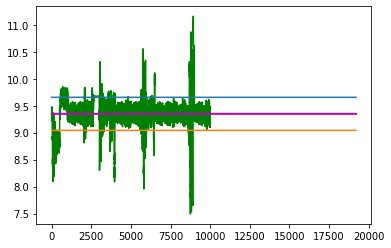

In [77]:
plt.plot(a, 'g-', markersize = 3)
plt.plot(mean*np.ones(19200), 'm-', linewidth = 2)
plt.plot((mean+1*std)*np.ones(19200))
plt.plot((mean-1*std)*np.ones(19200))

need for scaling?

In [80]:
# X.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
df_max_scaled = x.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_max_scaled)
tr_s = scaler.transform(df_max_scaled)

In [81]:
pd.DataFrame(data=tr_s)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-0.108499,0.303835,0.221611,-0.380926,-0.067060,0.164815,-0.182689,-0.081820,0.130031,-0.100901,0.105419,1.350520,-0.168474,-0.096012,0.502335,-0.204134,-0.140435,-0.164054,-0.222723,0.174332,0.137473,0.006207,0.177906,0.052364,-0.178726,0.010923,0.005654,0.242383,0.191256,0.052842,-0.189794,0.001736,-0.011338,0.236289,0.115862,0.128186,-0.122148,-0.115337,0.000892,-0.175279,0.022274,-0.242431,-0.043061,-0.310746,-0.004899,0.209925,-0.034380,1.350513,0.502772,-0.231699,-0.192445,-0.158833
1,-0.103668,-0.041777,0.482071,0.253957,-0.777854,0.757376,-0.172704,0.030040,0.130031,-0.124074,0.125056,0.100010,-0.155643,-0.675214,-1.202329,-0.192153,0.640231,-0.172592,-0.209450,0.182325,0.101297,0.270484,0.177906,0.052364,-0.178726,0.010923,0.005654,0.242383,0.191256,0.052842,-0.189794,0.001736,-0.011338,0.236289,0.115862,0.128186,-0.122148,-0.115337,0.000892,-0.175279,0.022274,0.039962,-0.194296,-0.314165,-0.608446,0.198638,-0.014894,0.100262,-1.202357,-0.236560,-0.181805,-0.314138
2,-0.108499,-0.020472,-0.261561,0.306863,-0.126293,-0.965817,-0.155588,-0.156937,0.268376,-0.130745,0.207068,0.244487,-0.131407,0.108132,0.058695,-0.172185,-1.499767,-0.164054,-0.216015,0.190318,0.109336,0.292337,-0.074675,-0.562961,-0.326884,-0.454016,0.239182,0.022930,0.202127,-0.250516,-0.216762,0.331219,0.156449,0.218209,0.147887,0.631085,-0.122148,-0.115337,0.000892,-0.175279,0.022274,0.023086,0.237869,-0.310300,-0.238050,0.261672,-0.009396,0.244892,0.058977,-0.234159,-0.198660,0.099347
3,-0.112650,0.003200,0.062126,0.421168,-0.621310,-0.989655,-0.141325,0.212934,-0.146660,-0.131916,0.256160,-0.060087,-0.129981,-1.768101,0.412054,-0.181504,0.055491,-0.137904,-0.246987,0.223287,0.003219,0.276630,-0.074675,-0.562961,-0.326884,-0.454016,0.239182,0.022930,0.202127,-0.250516,-0.216762,0.331219,0.156449,0.218209,0.147887,0.631085,-0.122148,-0.115337,0.000892,-0.175279,0.022274,0.003960,0.049513,-0.307376,-0.498761,0.239738,-0.008345,-0.059626,0.412168,-0.223030,-0.151886,-0.203206
4,0.188654,0.422196,-0.080372,-0.034419,-0.067060,1.009384,-0.171278,0.346838,-0.146660,-0.239705,0.116970,1.228495,-0.175603,0.919964,0.455738,-0.172185,-0.157142,-0.134168,-0.197603,0.163342,0.168022,-0.062081,0.258300,-1.493150,0.019846,-0.098474,0.013228,0.105923,0.236754,0.094039,-0.106559,-1.227777,0.067143,-0.020341,0.076356,-0.185438,-0.122148,-0.115337,0.000892,-0.175279,0.022274,0.243600,-0.082474,-0.105585,-0.340571,0.169464,-0.098336,1.228441,0.455792,-0.241304,-0.166213,-0.157098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.450903,1.120523,-0.073766,-0.430894,0.838356,-0.059949,-0.205510,0.210484,-0.008315,-0.288626,-0.171229,1.340758,-0.792923,-1.126231,-0.661613,-0.233421,-1.692656,-0.196074,-0.145222,-1.090503,0.171238,-0.264216,-0.137071,0.108980,-0.175640,-0.158974,0.345216,0.545627,0.210985,-0.490207,-0.235739,-1.193015,0.087891,0.246205,-0.268728,-0.160128,-1.022442,-0.136156,-0.060095,-0.511912,-0.056801,0.626124,-0.040770,-0.539098,-0.592462,-1.102064,-0.153398,1.340894,-0.661665,-0.173069,-0.189073,0.175079
9996,0.319505,0.126295,-0.206827,-0.310383,-0.849780,-0.618454,-0.196952,-0.358610,0.130031,-0.335440,-0.140619,-0.022015,-0.829991,-0.224196,0.111116,-0.218777,-0.151067,-0.203545,-0.136944,-1.284325,0.051454,-0.109884,-0.036278,0.138281,-0.196732,-0.405947,0.192476,-0.205301,0.285473,-0.153142,-0.194122,-0.048139,-0.164692,0.172715,0.338237,0.508386,-1.022442,-0.136156,-0.060095,-0.511912,-0.056801,0.451738,-0.105847,-0.005384,-0.337631,-1.249639,-0.163343,-0.022142,0.110991,-0.168032,-0.120493,-0.124500
9997,0.309842,0.306203,-0.235138,-0.187587,0.343339,-0.056543,-0.186968,0.130468,-0.146660,-0.316597,-0.058029,-1.881673,-0.855653,-0.

In [83]:
# copy the data
df_max_scaled = x.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)


,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.249085,0.961730,0.903397,0.827463,0.957688,0.967420,0.901433,0.879479,0.996359,0.422461,0.944115,0.964448,0.894753,0.844861,0.938641,0.900226,0.877721,0.900130,0.495543,0.896485,0.959789,0.946337,0.876031,0.901546,0.729074,0.928494,0.790169,0.866611,0.833451,0.906367,0.619459,0.610782,0.713315,0.869397,0.821590,0.818240,0.378381,0.635707,0.690993,0.958946,0.955525,0.855640,0.652605,0.246422,0.655701,0.560388,0.420399,0.883496,0.862055,0.473490,0.412456,0.211228
1,0.249791,0.957908,0.908902,0.844887,0.951704,0.971389,0.901667,0.881088,0.996359,0.419988,0.944517,0.940429,0.895059,0.824270,0.906021,0.900488,0.897492,0.899911,0.497550,0.896695,0.959333,0.951091,0.876031,0.901546,0.729074,0.928494,0.790169,0.866611,0.833451,0.906367,0.619459,0.610782,0.713315,0.869397,0.821590,0.818240,0.378381,0.635707,0.690993,0.958946,0.955525,0.859056,0.648598,0.245733,0.621261,0.559046,0.422936,0.804818,0.788678,0.472663,0.413466,0.196881
2,0.249085,0.958144,0.893184,0.846339,0.957189,0.959845,0.902067,0.878398,0.996442,0.419275,0.946191,0.943204,0.895637,0.852118,0.930152,0.900923,0.843296,0.900130,0.496558,0.896905,0.959434,0.951484,0.864573,0.888986,0.721115,0.920926,0.797955,0.852226,0.834134,0.901056,0.617366,0.631976,0.720456,0.868206,0.823405,0.850776,0.378381,0.635707,0.690993,0.958946,0.955525,0.858852,0.660049,0.246512,0.642397,0.566539,0.423652,0.813920,0.842957,0.473072,0.411866,0.235080
3,0.248478,0.958405,0.900026,0.849476,0.953022,0.959685,0.902400,0.883720,0.996194,0.419151,0.947194,0.937354,0.895670,0.785418,0.936914,0.900720,0.882683,0.900801,0.491874,0.897772,0.958095,0.951201,0.864573,0.888986,0.721115,0.920926,0.797955,0.852226,0.834134,0.901056,0.617366,0.631976,0.720456,0.868206,0.823405,0.850776,0.378381,0.635707,0.690993,0.958946,0.955525,0.858620,0.655058,0.247102,0.627520,0.563932,0.423789,0.794756,0.858156,0.474965,0.416305,0.207129
4,0.292529,0.963039,0.897014,0.836972,0.957688,0.973078,0.901700,0.885646,0.996194,0.407645,0.944351,0.962105,0.894583,0.880979,0.937750,0.900923,0.877298,0.900897,0.499342,0.896196,0.960174,0.945109,0.879678,0.869998,0.739741,0.926713,0.790422,0.857666,0.836309,0.907088,0.625917,0.531694,0.716655,0.852495,0.819351,0.797950,0.378381,0.635707,0.690993,0.958946,0.955525,0.861519,0.651561,0.287797,0.636547,0.555578,0.412072,0.875814,0.860034,0.471856,0.414946,0.211389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.199025,0.970761,0.897154,0.826091,0.965310,0.965914,0.900900,0.883685,0.996276,0.402423,0.938466,0.964261,0.879868,0.808236,0.916368,0.899588,0.838411,0.899308,0.507262,0.863223,0.960215,0.941473,0.861742,0.902702,0.729240,0.925729,0.801490,0.886488,0.834690,0.896859,0.615893,0.533930,0.717538,0.870050,0.799793,0.799587,0.166406,0.634398,0.685742,0.955608,0.954500,0.866145,0.652666,0.200370,0.622173,0.404425,0.404904,0.882891,0.811946,0.483466,0.412776,0.242076
9996,0.311659,0.959767,0.894341,0.829399,0.951099,0.962172,0.901100,0.875496,0.996359,0.397427,0.939091,0.938085,0.878985,0.840304,0.931155,0.899907,0.877452,0.899117,0.508514,0.858126,0.958704,0.944249,0.866315,0.903300,0.728107,0.921708,0.796398,0.837265,0.839369,0.902760,0.619123,0.607573,0.706788,0.865210,0.834193,0.842838,0.166406,0.634398,0.685742,0.955608,0.954500,0.864036,0.650942,0.308005,0.636714,0.386882,0.403609,0.797115,0.845196,0.484323,0.419284,0.214400
9997,0.310247,0.961756,0.893743,0.832769,0.961143,0.965937,0.901333,0.882533,0.996194,0.399438,0.940778,0.902364,0.878373,0.839359,0.916907,0.900517,0.914224,0.900116,0.510154,0.853607,0.959333,0.947467,0.866315,0.903300,0.728107,0.921708,0.796398,0.837265,0.839369,0.902760,0.619123,0.607573,0.706788,0.865210,0.834193,0.842838,0.166406,0.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


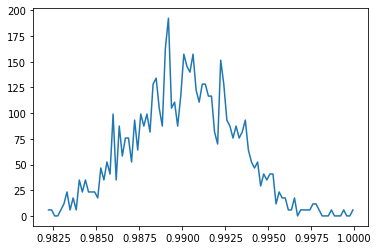

In [110]:
hist, bins = np.histogram(X_test_normal_scaled2[10], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


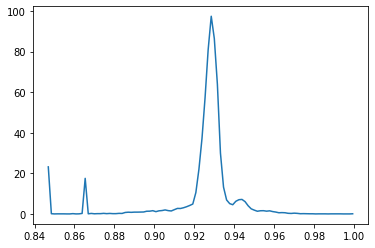

In [109]:
hist, bins = np.histogram(X_test_scaled2[10], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

#PCA

In [ ]:
X_train_fault_pca = X_train_fault.copy()
X_test_fault_pca = X_test_fault.copy()
y_train_fault_pca = y_train_fault.copy()
y_test_fault_pca = y_test_fault.copy()
X_train_normal_pca = X_train_normal.copy()
X_test_normal_pca = X_test_normal.copy()
y_train_normal_pca = y_train_normal.copy()
y_test_normal_pca = y_test_normal.copy()

how to find n_components?

In [36]:
n_components = 10 #choose the number of n-components for PCA

In [37]:
pca = PCA(n_components=n_components)

need for loading vector?

In [40]:
pca.fit(X_train_fault_pca)

In [39]:
pca.fit_transform(X_train_fault_pca)

array([[-35.9525397 , -14.11914375,  -4.96082722, ...,   0.56277458,
         -0.47091743,   1.1038965 ],
       [-43.1543175 , -35.68399717,  -0.95907186, ...,   2.23179553,
         -0.821137  ,  -1.9618147 ],
       [-13.34279705,  30.55626519,   8.81854759, ...,  -1.13374082,
          0.62163764,  -1.29926128],
       ...,
       [-35.7671483 ,  43.01006849,  -6.54668206, ...,  22.49875203,
          0.20357032,   4.60991586],
       [-53.21206456,   7.84973193, -18.98506344, ...,  24.55847881,
         -0.87233536,   2.14883194],
       [-64.66211882,  -1.85201328, -38.00218978, ...,  27.84270111,
         -1.12834818,   1.48228347]])

In [43]:
pca.explained_variance_ratio_

array([5.59626796e-01, 3.39545818e-01, 5.30855229e-02, 3.31202378e-02,
       6.48593309e-03, 2.39484957e-03, 2.06909596e-03, 1.25894288e-03,
       8.23193760e-04, 3.73138291e-04])

need Singular Values?

In [44]:
pca.singular_values_

array([13919.1194301 , 10842.05742583,  4286.97114661,  3386.17371324,
        1498.47238064,   910.54545273,   846.35551258,   660.18480275,
         533.84299133,   359.41601066])

In [45]:
pca.components_

array([[-3.39644171e-04, -7.76339382e-02, -3.53456822e-01,
         6.34359933e-04, -8.29112078e-05,  1.71180207e-04,
         4.52679065e-01, -1.83831719e-03,  1.82403831e-05,
        -2.62630993e-04, -1.09941579e-02,  2.73715029e-04,
         4.47112894e-01, -2.22113925e-06, -6.06166924e-04,
         5.01139219e-01, -1.42824560e-03,  5.45631376e-03,
         4.29237170e-01, -2.99803740e-02,  9.40037423e-04,
        -6.16773363e-03, -8.75164183e-03, -4.80760568e-04,
         1.16906696e-02, -1.32195920e-04, -3.24543226e-04,
        -3.19746482e-05, -1.29955360e-02, -6.53931994e-04,
         1.81504113e-02, -3.46698854e-05, -1.05087891e-03,
        -1.54259792e-04, -2.12652088e-03, -1.14609542e-03,
         1.02682346e-06,  2.27219253e-04,  1.57732052e-05,
         9.69807162e-04, -1.38696519e-03,  2.10250075e-03,
        -7.54200768e-03,  9.56742554e-02,  2.14432166e-02,
        -2.25740543e-02, -6.01516851e-02,  8.06201092e-04,
        -1.40280422e-03,  9.23298297e-02,  5.12601457e-0

need for find n_component from variance plot?

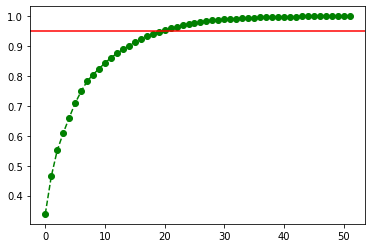

In [50]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_train)
pca = PCA().fit(data_rescaled)
# fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)
# xi = np.arange(1,y.all(), step=1)
# f = plt.figure(figsize=(10, 10))
# plt.ylim(0.0,1.1)
plt.plot( y, marker='o', linestyle='--', color='g')
# z = 0.95z*np.ones(52)
# plt.plot(0.95*np.ones(52))
plt.axhline(y=0.95, color='r', linestyle='-')

plt.show()
# f.savefig('component_PCA.pdf')

how to detect faults?

#ICA

how to find n_components?

In [ ]:
X_train_fault_ica = X_train_fault.copy()
X_test_fault_ica = X_test_fault.copy()
y_train_fault_ica = y_train_fault.copy()
y_test_fault_ica = y_test_fault.copy()
X_train_normal_ica = X_train_normal.copy()
X_test_normal_ica = X_test_normal.copy()
y_train_normal_ica = y_train_normal.copy()
y_test_normal_ica = y_test_normal.copy()

In [58]:
n_components = 15 #choose the number of n-components for ICA

In [59]:
transformer = FastICA(n_components=n_components,random_state=0)

In [60]:
transformer.fit_transform(X_train_fault_ica)

how to detect faults?

#PLS

In [ ]:
X_train_fault_pls = X_train_fault.copy()
X_test_fault_pls = X_test_fault.copy()
y_train_fault_pls = y_train_fault.copy()
y_test_fault_pls = y_test_fault.copy()
X_train_normal_pls = X_train_normal.copy()
X_test_normal_pls = X_test_normal.copy()
y_train_normal_pls = y_train_normal.copy()
y_test_normal_pls = y_test_normal.copy()

Create Matrix X

In [ ]:
X = 

Create Matrix Y

In [ ]:
Y  = 

In [51]:
n_components =20 #choose the number of n-components for PLS

In [52]:
pls2 = PLSRegression(n_components=n_components)

In [53]:
pls2.fit(X_train_fault_pls, y_train_fault_pls)

PLSRegression(n_components=20)

 how to select the fault type from Y_pred? 
 
 overstimate or understimate ? 
 
 how to prevent?

In [57]:
Y_pred = pls2.predict(X_test_fault_pls)

In [58]:
Y_pred

array([[12.24642616],
       [11.67360407],
       [11.54678801],
       ...,
       [13.22421755],
       [13.13437348],
       [12.1043322 ]])

In [114]:
pls2.score(X_test_fault_pls, y_test_fault_pls) #Return the coefficient of determination of the prediction.

0.31183550166022866

In [115]:
pls2.get_params()   #Get parameters for this estimator.

{'copy': True,
 'max_iter': 500,
 'n_components': 20,
 'scale': True,
 'tol': 1e-06}

In [133]:
pls2.fit_transform(X_test_fault_pls)

ValueError: ignored

#FDA

In [ ]:
X_train_fault_fda = X_train_fault.copy()
X_test_fault_fda = X_test_fault.copy()
y_train_fault_fda = y_train_fault.copy()
y_test_fault_fda = y_test_fault.copy()
X_train_normal_fda = X_train_normal.copy()
X_test_normal_fda = X_test_normal.copy()
y_train_normal_fda = y_train_normal.copy()
y_test_normal_fda = y_test_normal.copy()

In [60]:
clf = LinearDiscriminantAnalysis()

In [63]:
clf.fit(X_train_fault_fda, y_train_fault_fda)

LinearDiscriminantAnalysis()

In [64]:
clf.predict(X_test_fault_fda)

array([11, 14, 11, ..., 20, 20, 20])

how to detect faults?

#Tutorial

##Scikit-Learn Library

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[ICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

[PLS](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)

[FDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

## Theory

Related class powerpoints